Question 1: The relationship does not seem to be very linear. It seems to linearly decrease from 1948 to 1988; however, there is a short increase to the year 2000 and decreases again towards 2008. Therefore, the relationship does not appear to be linear.


Question 2: A blue line has been fitted into the scatter plot. When calculating the mean squared loss, we subtract the value on the line from the actual value given (estimated - target) for all data points average them once getting the sum ((estimate - target) / N). 

--- MSE: 0.21367694852941077 



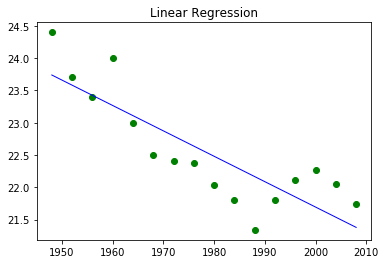

In [2]:
'''
Name:  Alexander Truong
Prof:  Kenytt Avery
Class: CPSC 483
Proj:  Project 1

Most code here is reused and credit goes to the creators of these Notebooks
under the GitHub usernames:
    sdrogers
    AliceMiller2
'''

# ---------------- #
# BEGIN QUESTION 1 #
# ---------------- #
import csv, numpy as np, matplotlib.pyplot as plot

data = np.loadtxt('female200.csv', delimiter=',')

x = data[:,0][:,None]
t = data[:,1][:,None]

plot.plot(x, t, 'go') # Plot all points

print("Question 1: The relationship does not seem to be very linear. It seems",
    "to linearly decrease from 1948 to 1988; however, there is a short",
    "increase to the year 2000 and decreases again towards 2008. Therefore,",
    "the relationship does not appear to be linear.\n\n")

# -------------- #
# END QUESTION 1 #
# -------------- #


# ---------------- #
# BEGIN QUESTION 2 #
# ---------------- #

x_bar = x.mean()
t_bar = t.mean()
#print(x_bar)
#print(t_bar)

x_squared_bar = np.multiply(x, x).mean()
xt_bar = np.multiply(x, t).mean()
#print(x_squared_bar)
#print(xt_bar)

w1_hat = ((x_bar * t_bar) - xt_bar) / ((x_bar * x_bar) - x_squared_bar)
w0_hat = t_bar - (w1_hat * x_bar)
#print(w1_hat)
#print(w0_hat)

x_test = np.linspace(1948, 2008, 30)[:,None]
f_test = w0_hat + w1_hat * x_test


plot.plot(x_test, f_test, 'b-', linewidth=1) # Plot best-fit blue line
plot.title("Linear Regression")

diff_squared = []
for year, data_val in zip(x, t):
    diff_squared.append(((w0_hat + w1_hat * year) - data_val) ** 2)
    
mse = np.array(diff_squared).mean()
#print(mse)

print("Question 2: A blue line has been fitted into the scatter plot. When",
    "calculating the mean squared loss, we subtract the value on the line",
    "from the actual value given (estimated - target) for all data points",
    "average them once getting the sum ((estimate - target) / N).",
    "\n\n--- MSE:", mse, "\n")

# -------------- #
# END QUESTION 2 #
# -------------- #

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.61616162e-01 2.61197837e-02 4.22137918e-03]
 [1.00000000e+00 3.23232323e-01 1.04479135e-01 3.37710335e-02]
 [1.00000000e+00 4.84848485e-01 2.35078053e-01 1.13977238e-01]
 [1.00000000e+00 6.46464646e-01 4.17916539e-01 2.70168268e-01]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01 5.27672398e-01]
 [1.00000000e+00 9.69696970e-01 9.40312213e-01 9.11817904e-01]
 [1.00000000e+00 1.13131313e+00 1.27986940e+00 1.44793306e+00]
 [1.00000000e+00 1.29292929e+00 1.67166616e+00 2.16134614e+00]
 [1.00000000e+00 1.45454545e+00 2.11570248e+00 3.07738542e+00]
 [1.00000000e+00 1.61616162e+00 2.61197837e+00 4.22137918e+00]
 [1.00000000e+00 1.77777778e+00 3.16049383e+00 5.61865569e+00]
 [1.00000000e+00 1.93939394e+00 3.76124885e+00 7.29454323e+00]
 [1.00000000e+00 2.10101010e+00 4.41424344e+00 9.27437007e+00]
 [1.00000000e+00 2.26262626e+00 5.11947760e+00 1.15834645e+01]
 [1.00000000e+00 2.42424242e+00 5.87695133e+00 1.424715

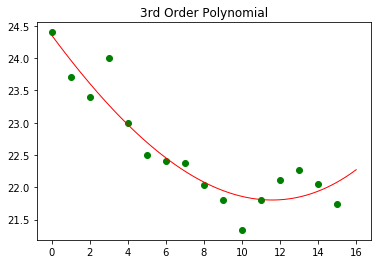

In [6]:
# ---------------- #
# BEGIN QUESTION 3 #
# ---------------- #
import csv, numpy as np, matplotlib.pyplot as plot

data = np.loadtxt('female200.csv', delimiter=',')

mse_linear = 0.21367694852941077 # obtained from question 2

x = data[:,0][:,None]
t = data[:,1][:,None]

x = (x - 1948) / 4

plot.plot(x, t, 'go') # Plot all points

maxorder = 3

X = np.ones_like(x)
x_test = np.linspace(0, 16, 100)[:,None]
X_test = np.ones_like(x_test)
#print(X)
#print(x_test)
#print(X_test)

for i in range(1, maxorder + 1):
    X = np.hstack((X, x ** i))
    X_test = np.hstack((X_test, x_test ** i))

#print(X)
print(X_test)

w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
#print(w)

f_test = np.dot(X_test, w)
#print(f_test)

plot.plot(x_test, f_test, 'r-', linewidth=1)
plot.title("3rd Order Polynomial")

third_ord_reg_vals = np.dot(X, w)
mse_3rd = np.square(np.subtract(third_ord_reg_vals, t)).mean()
#print(mse_3rd)

print('Question 3: The 3rd order polynomial regression is outlined in red below.',
     '\n\n--- MSE of 3rd Order Polynomial:', mse_3rd,
     '\n--- MSE of linear regression:\t', mse_linear,
     '\n\nThe MSE of the 3rd order polynomial regression is less than the linear',
     'regression\'s MSE.')
# -------------- #
# END QUESTION 3 #
# -------------- #

[[ 2.43230728e+01]
 [-6.35049893e-01]
 [ 2.14488469e-01]
 [-4.71367687e-02]
 [ 4.16775820e-03]
 [-1.22816941e-04]]
Question 4: The 5th order polynomial regression is outlined in magenta below. 

--- MSE of 5th Order Polynomial: 0.05161528042391048 
--- MSE of 3rd Order Polynomial: 0.08717867111925753 
--- MSE of linear regression:	 0.21367694852941077 

The MSE of the 5th order polynomial regression is less than both the linear regression's and 3rd order polynomial's MSE.




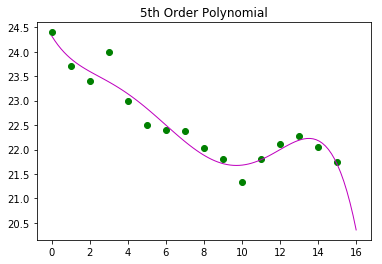

In [5]:
# ---------------- #
# BEGIN QUESTION 4 #
# ---------------- #
import csv, numpy as np, matplotlib.pyplot as plot

data = np.loadtxt('female200.csv', delimiter=',')

mse_linear = 0.21367694852941077  # obtained from question 2
mse_3rd = 0.08717867111925753     # obtained from question 3

x = data[:,0][:,None]
t = data[:,1][:,None]

x = (x - 1948) / 4

plot.plot(x, t, 'go') # Plot all points

maxorder = 5

X = np.ones_like(x)
x_test = np.linspace(0, 16, 100)[:,None]
X_test = np.ones_like(x_test)
#print(X)
#print(x_test)
#print(X_test)

for i in range(1, maxorder + 1):
    X = np.hstack((X, x ** i))
    X_test = np.hstack((X_test, x_test ** i))

#print(X)
#print(X_test)
    
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
print(w)

f_test = np.dot(X_test, w)
#print(f_test)

plot.plot(x_test, f_test, 'm-', linewidth=1)
plot.title("5th Order Polynomial")

fifth_ord_reg_vals = np.dot(X, w)
mse_5th = np.square(np.subtract(fifth_ord_reg_vals, t)).mean()
#print(mse_5th)

print('Question 4: The 5th order polynomial regression is outlined in magenta below.',
     '\n\n--- MSE of 5th Order Polynomial:', mse_5th,
     '\n--- MSE of 3rd Order Polynomial:', mse_3rd,
     '\n--- MSE of linear regression:\t', mse_linear,
     '\n\nThe MSE of the 5th order polynomial regression is less than both the',
     'linear regression\'s and 3rd order polynomial\'s MSE.\n\n')
# -------------- #
# END QUESTION 4 #
# -------------- #

Question 5: Based on the scatter plots for linear regression (blue), the 3rd order polynomial (red), and the 5th order polynomial (magenta), the 5th order polynomial looks like a better model of the data. However, we must be aware that we may be overfitting the data.



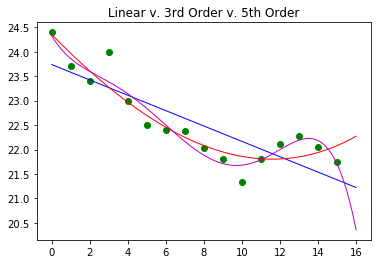

In [13]:
# ---------------- #
# BEGIN QUESTION 5 #
# ---------------- #
import csv, numpy as np, matplotlib.pyplot as plot

data = np.loadtxt('female200.csv', delimiter=',')

x = data[:,0][:,None]
t = data[:,1][:,None]

x = (x - 1948) / 4

plot.plot(x, t, 'go') # Plot all points

x_bar = x.mean()
t_bar = t.mean()
#print(x_bar)
#print(t_bar)

x_squared_bar = np.multiply(x, x).mean()
xt_bar = np.multiply(x, t).mean()
#print(x_squared_bar)
#print(xt_bar)

w1_hat = ((x_bar * t_bar) - xt_bar) / ((x_bar * x_bar) - x_squared_bar)
w0_hat = t_bar - (w1_hat * x_bar)
#print(w1_hat)
#print(w0_hat)

x_test_linear = np.linspace(0, 16, 100)[:,None]
f_test_linear = w0_hat + w1_hat * x_test

plot.plot(x_test_linear, f_test_linear, 'b-', linewidth=1) # Plot best-fit blue line

maxorder = 3

X_3rd = np.ones_like(x)
x_test_3rd = np.linspace(0, 16, 100)[:,None]
X_test_3rd = np.ones_like(x_test_3rd)

for i in range(1, maxorder + 1):
    X_3rd = np.hstack((X_3rd, x ** i))
    X_test_3rd = np.hstack((X_test_3rd, x_test_3rd ** i))
        
w_3rd = np.dot(np.linalg.inv(np.dot(X_3rd.T, X_3rd)), np.dot(X_3rd.T, t))

f_test_3rd = np.dot(X_test_3rd, w_3rd)

plot.plot(x_test_3rd, f_test_3rd, 'r-', linewidth=1)

maxorder = 5

X_5th = np.ones_like(x)
x_test_5th = np.linspace(0, 16, 100)[:,None]
X_test_5th = np.ones_like(x_test_5th)

for i in range(1, maxorder + 1):
    X_5th = np.hstack((X_5th, x ** i))
    X_test_5th = np.hstack((X_test_5th, x_test_5th ** i))

w_5th = np.dot(np.linalg.inv(np.dot(X_5th.T, X_5th)), np.dot(X_5th.T, t))
        
f_test_5th = np.dot(X_test_5th, w_5th)

plot.plot(x_test_5th, f_test_5th, 'm-', linewidth=1)
plot.title("Linear v. 3rd Order v. 5th Order")

print('Question 5: Based on the scatter plots for linear regression (blue), the 3rd',
     'order polynomial (red), and the 5th order polynomial (magenta), the 5th order', 
     'polynomial looks like a better model of the data. However, we must be aware that',
     'we may be overfitting the data.\n')

# -------------- #
# END QUESTION 5 #
# -------------- #

Question 6: Incorporating the L2 regularisation code has been fitted with the 5th order polynomial, the best fit seems to be when $\lambda = 0.01. The data does not overfit and fits the model nicely, whereas $\lambda = 0 seems to majorly overfit the data. Alternatively, when $\lambda = 0.1, 1, 10, or 100, the model dramatically changes and seems to no longer be a good fit for the data we are given.


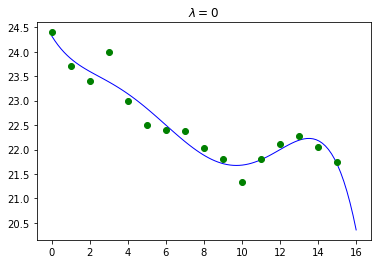

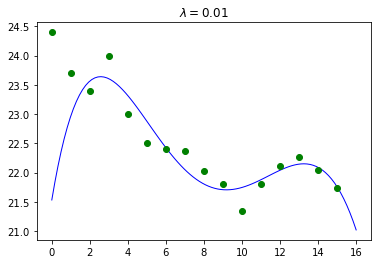

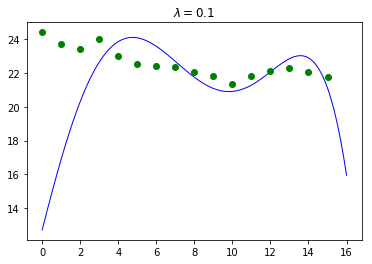

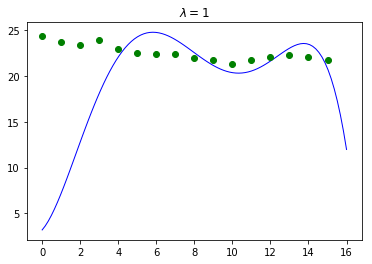

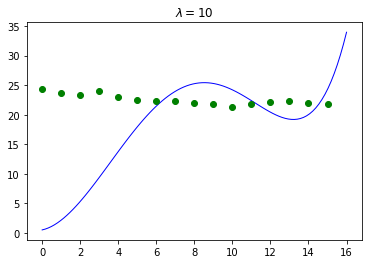

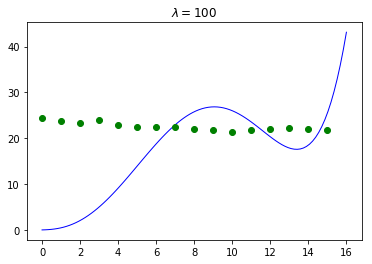

In [14]:
# ---------------- #
# BEGIN QUESTION 6 #
# ---------------- #
import csv, numpy as np, matplotlib.pyplot as plot

data = np.loadtxt('female200.csv', delimiter=',')

x = data[:,0][:,None]
t = data[:,1][:,None]

x = (x - 1948) / 4

#plot.plot(x, t, 'go') # Plot all points

maxorder = 5

X = np.ones_like(x)
x_test = np.linspace(0, 16, 100)[:,None]
X_test = np.ones_like(x_test)
#print(X)
#print(x_test)
#print(X_test)

for i in range(1, maxorder + 1):
    X = np.hstack((X, x ** i))
    X_test = np.hstack((X_test, x_test ** i))
    
#print(X)
#print(X_test)

for lmbd in [0, 0.01, 0.1, 1, 10, 100]:
    w = np.linalg.solve(np.dot(X.T, X) + x.size * lmbd * np.identity(maxorder + 1), np.dot(X.T, t))
    #print(w)
    f_test = np.dot(X_test, w)
    #print(f_test)
    plot.figure()
    plot.plot(x_test, f_test, 'b-', linewidth=1)
    plot.plot(x, t, 'go')
    title = '$\lambda = $%g' % lmbd
    plot.title(title)
    
print('Question 6: Incorporating the L2 regularisation code has been fitted with the 5th',
     'order polynomial, the best fit seems to be when $\lambda = 0.01. The data does not',
     'overfit and fits the model nicely, whereas $\lambda = 0 seems to majorly overfit the',
     'data. Alternatively, when $\lambda = 0.1, 1, 10, or 100, the model dramatically',
     'changes and seems to no longer be a good fit for the data we are given.')

# -------------- #
# END QUESTION 6 #
# -------------- #